In [1057]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [1012]:
data=pd.read_csv('Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [1013]:
#display the last  5 lines of the file
data.tail(5) 

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [1014]:
print("rows and  columns of the data: ", data.shape)

rows and  columns of the data:  (545, 13)


In [1015]:
data.info

<bound method DataFrame.info of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no

In [1016]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [1017]:
data.describe(include='all')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [1018]:
#check null values
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

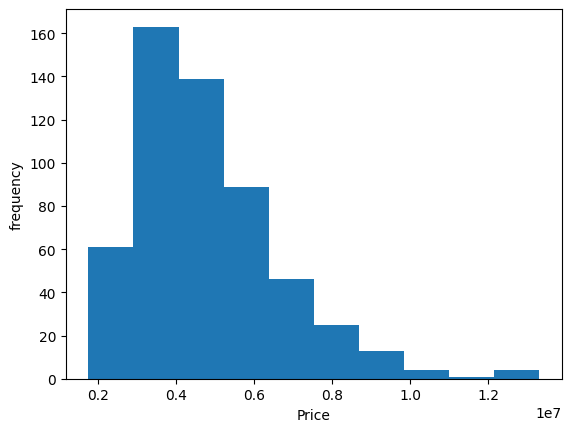

In [1019]:
#EDA(Exploratory data analysis)
# histogram is to measure the distribution of the data 

plt.hist(data['price'])
plt.xlabel('Price')
plt.ylabel('frequency')
plt.show()

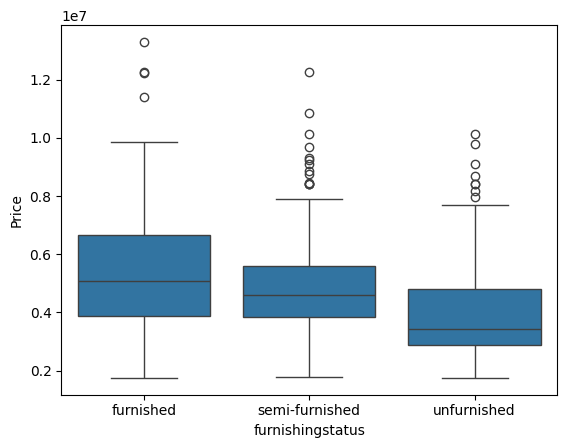

In [1020]:
#box plot  =    price vs funishingstatus

sns.boxplot(x='furnishingstatus',y='price',data=data)
plt.xlabel('furnishingstatus')
plt.ylabel('Price')
plt.show()


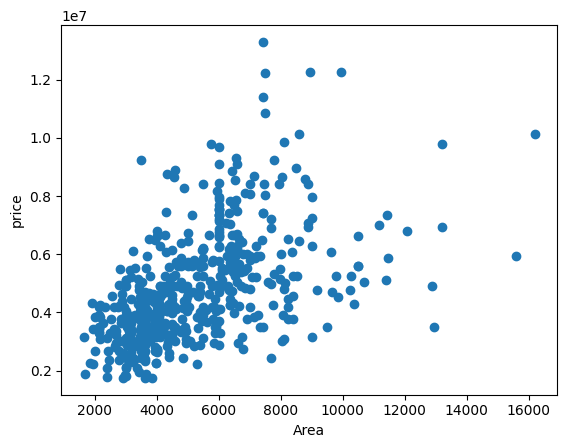

In [1021]:
#scatter plot = area vs price

plt.scatter(data['area'],data['price'])
plt.xlabel('Area')
plt.ylabel('price')
plt.show()

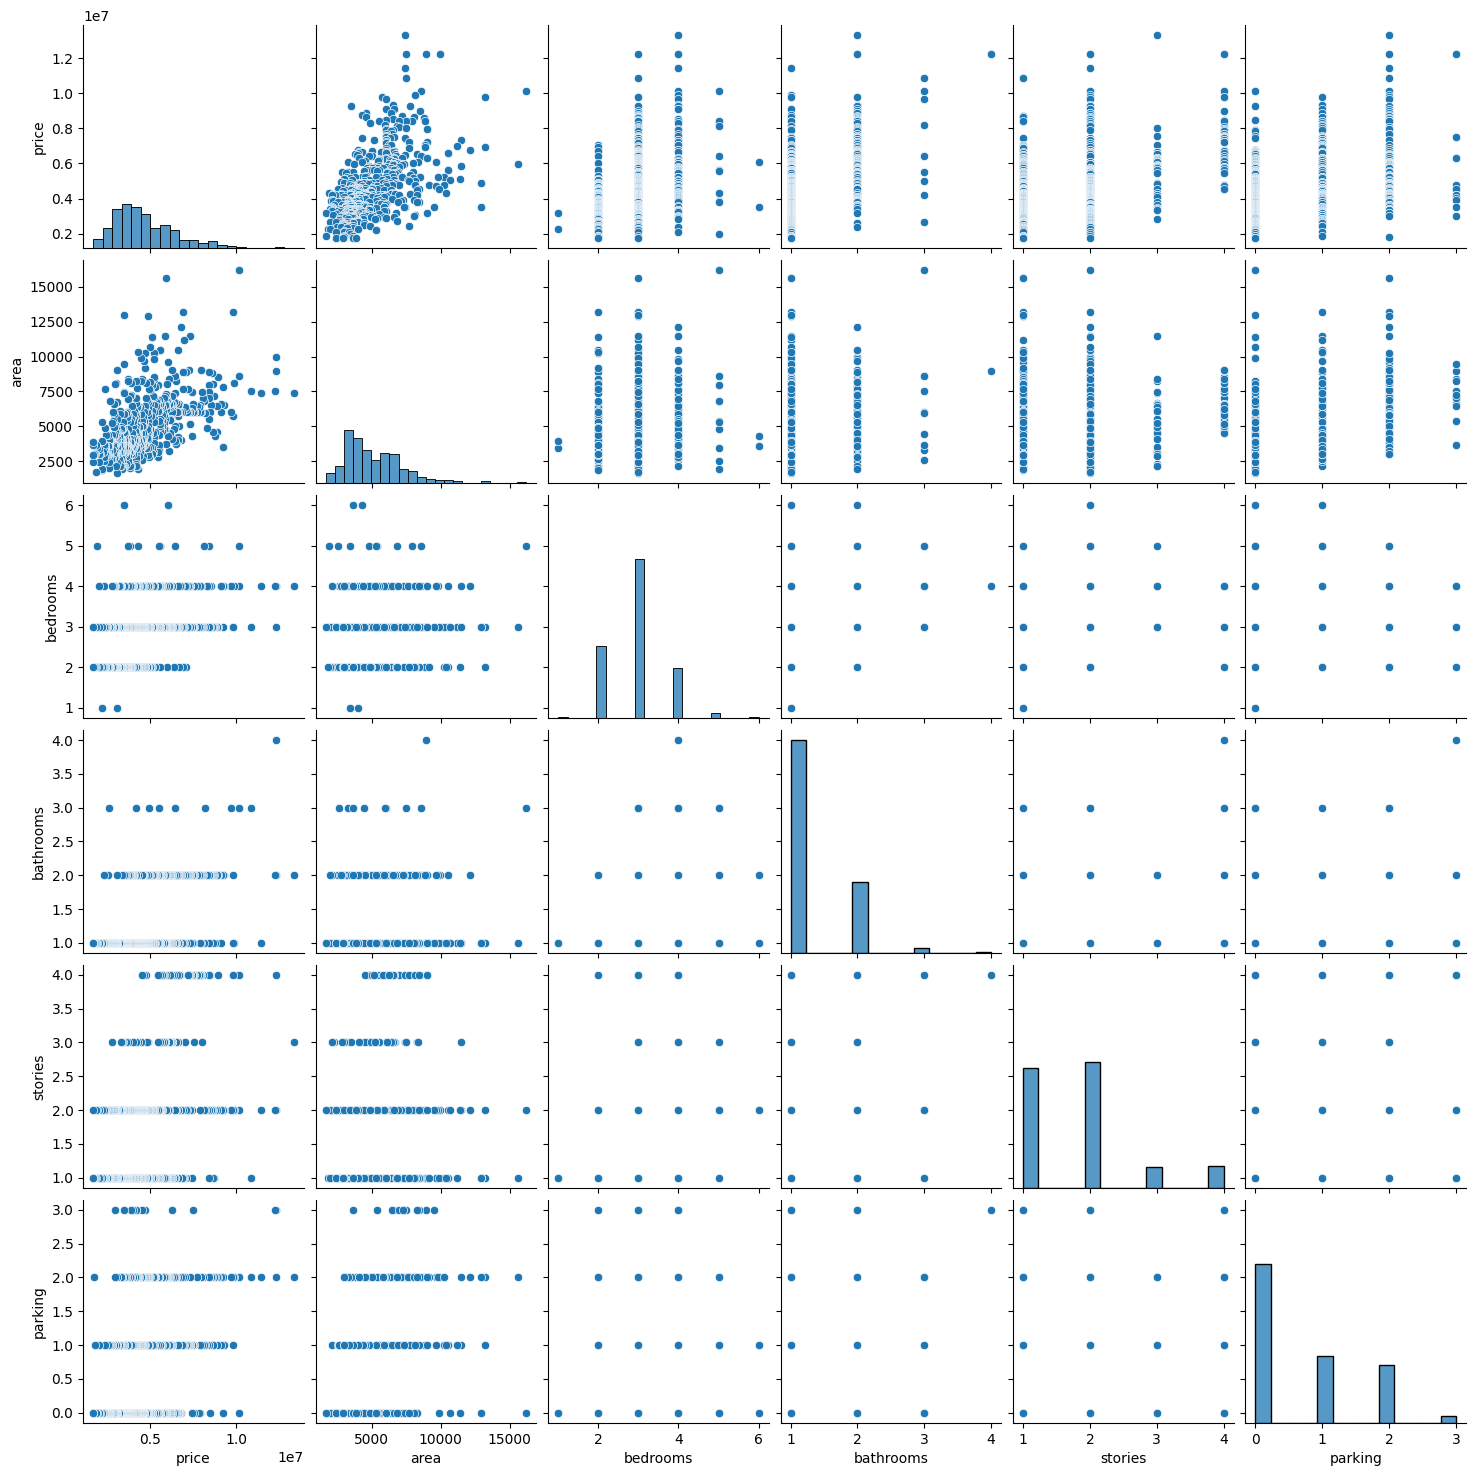

In [1022]:
sns.pairplot(data)
plt.show()

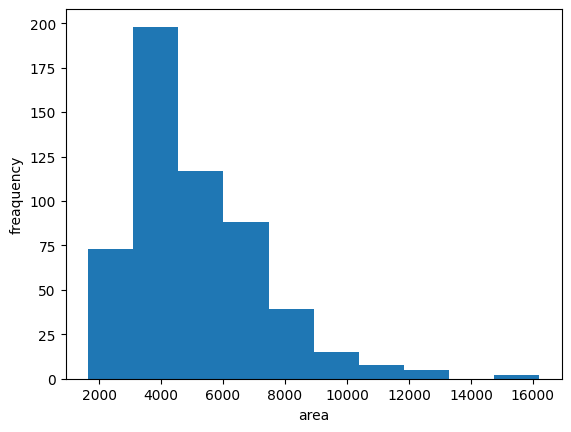

In [1023]:
#histogram area

plt.hist(data['area'],bins=10)
plt.xlabel('area')
plt.ylabel('freaquency')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_23376\407053975.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['price'],shade=True)


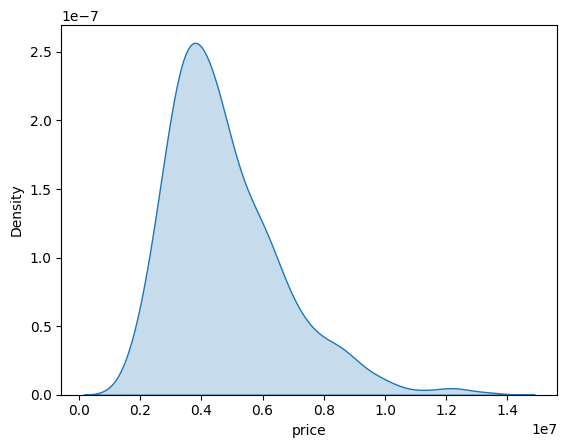

In [1024]:
sns.kdeplot(data['price'],shade=True)
plt.xlabel('price')
plt.ylabel('Density')
plt.show()

In [1025]:
# Handling binary categorical  data (yes/no)

categorical_col =['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']


In [1026]:
data[categorical_col]   

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


In [1027]:
def binaru_map(x):
    
    """function to map 'yes' ans 'no' values to 1 and 0 respectively.
    parameters:
    x(panda series):input series containing 'yes' and 'no'values. 
    return:
    panda  series:output series with 'yes' mapped to 1 and 'no' mapped to 0.
    """
    return x.map({'yes':1,'no':0})
        

In [1028]:
# apply the binary_map function to multiple  columns in the data frame
data[categorical_col]=data[categorical_col].apply(binaru_map)

#display the updated  data frame
data[categorical_col]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,1,0,0,0,1,1,NaN
1,1,0,0,0,1,0,NaN
2,1,0,1,0,0,1,NaN
3,1,0,1,0,1,1,NaN
4,1,1,1,0,1,0,NaN
...,...,...,...,...,...,...,...
540,1,0,1,0,0,0,NaN
541,0,0,0,0,0,0,NaN
542,1,0,0,0,0,0,NaN
543,0,0,0,0,0,0,NaN


In [1029]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,NaN
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,NaN
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,NaN
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,NaN
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,NaN


In [1030]:
#handling a categorical data with dummy variables 

dummy_col=pd.get_dummies(data['furnishingstatus'])

dummy_col.head()

""
0
1
2
3
4


In [1031]:
dummy_col=pd.get_dummies(data['furnishingstatus'],drop_first=True)

dummy_col.head()

""
0
1
2
3
4


In [1032]:
#concatination  of two dataframes  

data = pd.concat([data,dummy_col],axis=1)

#disply the  data
data.head()



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,NaN
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,NaN
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,NaN
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,NaN
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,NaN


In [1033]:
#drop the funishingstatus  column

data.drop(['furnishingstatus'],axis=1,inplace=True)

data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [1034]:
bool_columns = data.select_dtypes(include='bool').columns

#convert the bool column to int type

data[bool_columns]=data[bool_columns].astype(int)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


#splitting data into train  and test sets

In [1035]:
#check the columns
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea'],
      dtype='object')

In [1036]:
np.random.seed(0)

df_train,df_test=train_test_split(data,train_size=0.7,test_size=0.3,random_state=100)

In [1037]:
df_train.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
359,3710000,3600,3,1,1,1,0,0,0,0,1,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1
159,5460000,3150,3,2,1,1,1,1,0,1,0,0
35,8080940,7000,3,2,4,1,0,0,0,1,2,0
28,8400000,7950,5,2,2,1,0,1,1,0,2,0


In [1038]:
df_train.shape

(381, 12)

In [1039]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
265,4403000,2880,3,1,2,1,0,0,0,0,0,1
54,7350000,6000,3,2,2,1,1,0,0,1,1,0
171,5250000,10269,3,1,1,1,0,0,0,0,1,1
244,4550000,5320,3,1,2,1,1,1,0,0,0,1
268,4382000,4950,4,1,2,1,0,0,0,1,0,0


In [1040]:
df_test.shape

(164, 12)

#scaling training data:MinMaxScaler

In [1041]:
from sklearn.preprocessing import MinMaxScaler
scaler = minmax_scale

In [1042]:
col_to_scale=['area','bedrooms','stories','parking','price']


In [1043]:
scaler = StandardScaler()
df_train[col_to_scale] = scaler.fit_transform(df_train[col_to_scale])

In [1044]:
#training the model

y_train =df_train.pop('price')
x_train=df_train

In [1045]:
linear_regression = LinearRegression()


In [1046]:
linear_regression.fit(x_train,y_train)

LinearRegression()

In [1047]:
coufficents =linear_regression.coef_

print(coufficents)

[0.27328851 0.04962296 0.61768285 0.20477082 0.34459708 0.18088633
 0.14860956 0.56410138 0.44031293 0.11649316 0.38396736]


In [1048]:
score= linear_regression.score(x_train,y_train)
print(score)

0.6731864539179915


In [1049]:
#scaling test data
col_to_scale=['area','bedrooms','bathrooms','stories','parking','price']

In [1050]:
scaler = StandardScaler()
df_test[col_to_scale] = scaler.fit_transform(df_test[col_to_scale])

In [1051]:
 #Testing our model
 
y_test=df_test.pop('price')
x_test=df_test

In [1052]:
prediction=linear_regression.predict(x_test)

In [1053]:
r2=r2_score(y_test,prediction)
r2

-0.04590293359145625

In [1054]:
#compare the actual and predicted value
y_test.shape
y_test_matrix=y_test.values.reshape(-1,1)

In [1055]:
data_frame = pd.DataFrame({'actual':y_test_matrix.flatten(),'predicted':prediction.flatten()})

In [1056]:
data_frame.head(10)

,actual,predicted
0,-0.195156,-1.340941
1,1.292163,0.488182
2,0.232316,-0.613314
3,-0.120967,-0.733710
4,-0.205755,-0.981501
5,-0.050310,-1.425091
6,1.892744,1.284324
7,0.232316,-0.042986
8,-1.039502,-1.594244
9,0.585598,-0.573651


Text(0, 0.5, 'predicted')

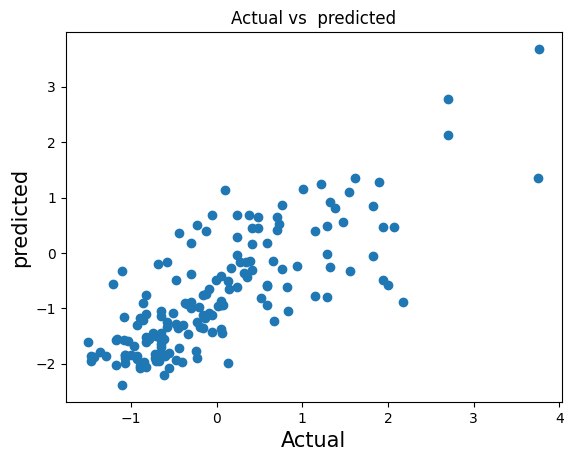

In [1060]:
# plotting a graph

fig =plt.figure()

plt.scatter(y_test,prediction)

plt.title('Actual vs  predicted')
plt.xlabel('Actual',fontsize=15)
plt.ylabel('predicted',fontsize=15)

In [1063]:
from sklearn.metrics import  mean_squared_error

mse=mean_squared_error(y_test,prediction)
print("Mean_Squared_Error:",mse)

Mean_Squared_Error: 1.0459029335914563


In [1065]:

#TO PERFORME ANOTHER REGRESSION MODELS

from sklearn.neighbors import  KNeighborsRegressor
from sklearn.tree import  DecisionTreeRegressor
knn_model= KNeighborsRegressor(n_neighbors=5)
knn_model.fit(x_train,y_train)
knn_y_pred=knn_model.predict(x_test)
knn_mse=mean_squared_error(y_test,knn_y_pred)
knn_r2=r2_score(y_test,knn_y_pred)

In [1066]:
print("mean_squared_error:",knn_mse)
print("R-squared:",knn_r2)

mean_squared_error: 0.4062620031728339
R-squared: 0.5937379968271661


In [1067]:
dt_model =DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train,y_train)
dt_y_pred=dt_model.predict(x_test)

In [1068]:
dt_mse=mean_squared_error(y_test,dt_y_pred)
dt_r2=r2_score(y_test,dt_y_pred)

In [1069]:
print("mean_squared_error:",dt_mse)
print("R-squared:",dt_r2)

mean_squared_error: 0.9242251264100156
R-squared: 0.07577487358998436


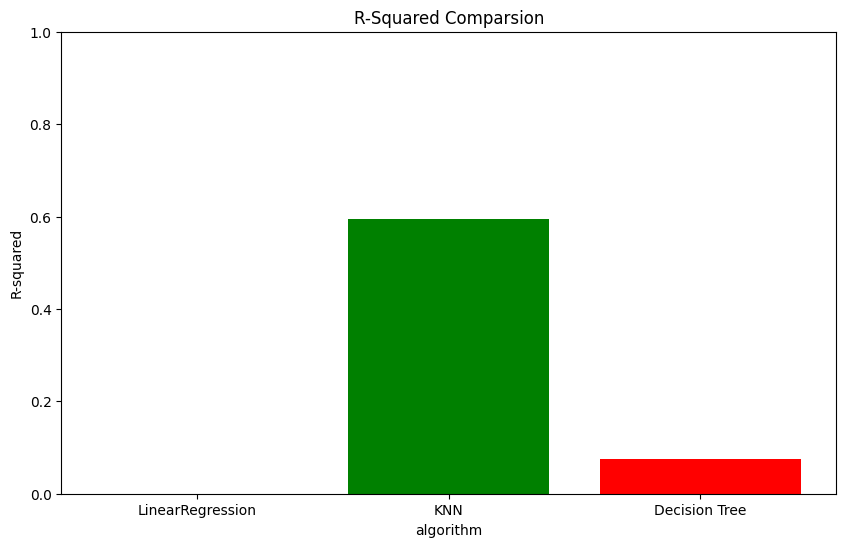

In [1078]:
import matplotlib.pyplot as plt

algorithms =['LinearRegression','KNN','Decision Tree']
r2_score=[r2,knn_r2,dt_r2]

plt.figure(figsize=(10,6))
plt.bar(algorithms,r2_score,color=['blue','green','red'])
plt.title('R-Squared Comparsion')
plt.xlabel('algorithm')
plt.ylabel('R-squared')
plt.ylim(0,1)
plt.show()

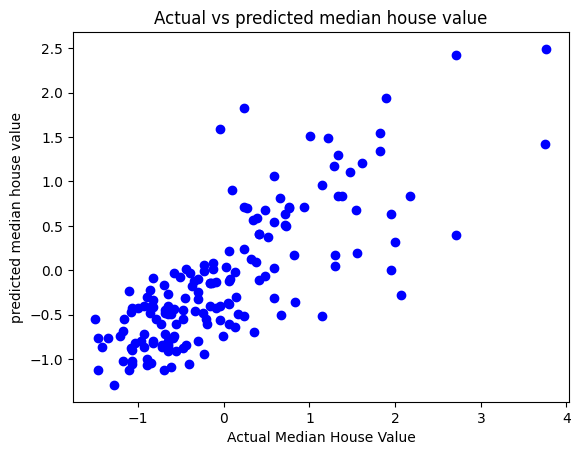

In [1079]:
plt.Figure(figsize=(10,6))
plt.scatter(y_test,knn_y_pred,color='blue')
plt.title('Actual vs predicted median house value')
plt.xlabel('Actual Median House Value')
plt.ylabel('predicted median house value')
plt.show()